<a href="https://colab.research.google.com/github/ras1364/Run10SentenceBert/blob/main/SentenceBertAveragePooling1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this code, the sentences individually + Sentence-BERT encoder +  AveragePooling  + NLP network **

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving X_test1.csv to X_test1.csv
Saving X_train1.csv to X_train1.csv
Saving y_test1.csv to y_test1.csv
Saving y_train1.csv to y_train1.csv


In [3]:
num = "1"
X_test = pd.read_csv("/content/X_test"+num+".csv")
X_train = pd.read_csv("/content/X_train"+num+".csv")
y_test = pd.read_csv("/content/y_test"+num+".csv")
y_train = pd.read_csv("/content/y_train"+num+".csv")

In [4]:
max_length = 100
# for x in range(0,len(X_train)):
#   line = X_train.loc[x].at["text"]
#   if max_length < len(line.split()) :
#     max_length = len(line.split())

print(max_length)


100


In [5]:
from gensim.parsing.preprocessing import remove_stopwords

def preprocess(text):
  return remove_stopwords(text)

X_train["stemmed_text_data"] = X_train["text"].map(preprocess)
X_test["stemmed_text_data"] = X_test["text"].map(preprocess)

In [6]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125924 sha256=735bc2a11b95716a6a13e74be39f719e753fb63a5a4f328dbd740cf39f5f15f3
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [7]:
def percent_complete(step, total_steps, bar_width=60, title="", print_perc=True):
    import sys

    # UTF-8 left blocks: 1, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8
    utf_8s = ["█", "▏", "▎", "▍", "▌", "▋", "▊", "█"]
    perc = 100 * float(step) / float(total_steps)
    max_ticks = bar_width * 8
    num_ticks = int(round(perc / 100 * max_ticks))
    full_ticks = num_ticks / 8      # Number of full blocks
    part_ticks = num_ticks % 8      # Size of partial block (array index)

    disp = bar = ""                 # Blank out variables
    bar += utf_8s[0] * int(full_ticks)  # Add full blocks into Progress Bar

    # If part_ticks is zero, then no partial block, else append part char
    if part_ticks > 0:
        bar += utf_8s[part_ticks]

    # Pad Progress Bar with fill character
    bar += "▒" * int((max_ticks/8 - float(num_ticks)/8.0))

    if len(title) > 0:
        disp = title + ": "         # Optional title to progress display

    # Print progress bar in green: https://stackoverflow.com/a/21786287/6929343
    disp += "\x1b[0;32m"            # Color Green
    disp += bar                     # Progress bar to progress display
    disp += "\x1b[0m"               # Color Reset
    if print_perc:
        # If requested, append percentage complete to progress display
        if perc > 100.0:
            perc = 100.0            # Fix "100.04 %" rounding error
        disp += " {:6.2f}".format(perc) + " %"

    # Output to terminal repetitively over the same line using '\r'.
    sys.stdout.write("\r" + disp)
    sys.stdout.flush()

In [11]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import tensorflow as tf

def encode(text, maxlen,maxSentence,mtitle):
  embeddings=[]
  counter = 1
  for row in text:
    embedding =[]
    counter+=1
    sentecesCoutner = 0
    percent_complete(counter, len(text), title=mtitle)
    for sent in sent_tokenize(row):
      sentecesCoutner+=1
      if(sentecesCoutner<maxSentence):
        embedding.append(sbert_model.encode(sentences=sent ,convert_to_numpy=True ))

    loop = 50 - len(embedding)
    for x in range(loop):
      embedding.append(np.zeros([384],dtype=float))
    embeddings.append(embedding)

  return embeddings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
import time

In [13]:
max_sentence = 50
startedTime = time.time()
X_train_encoded = encode(X_train.stemmed_text_data,max_length,max_sentence,"X_train_embedding")
endTime= time.time()
print("\nElapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")

X_train_embedding: ████████████████████████████████████████████████████████████ 100.00 %
Elapsed Time :  280.04274797439575 sec or  4.6673791329065955 min


In [14]:
startedTime = time.time()
X_test_encoded = encode(X_test.stemmed_text_data,max_length,max_sentence,"X_test_embedding")
endTime= time.time()
print("\nElapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")

X_test_embedding: ████████████████████████████████████████████████████████████▎ 100.00 %
Elapsed Time :  65.37611222267151 sec or  1.0896018703778585 min


In [15]:
X_train_embedding_squeezed = np.squeeze(X_train_encoded)
X_test_embedding_squeezed = np.squeeze(X_test_encoded)

In [16]:
print("X_train.shape = " , np.shape(X_train_embedding_squeezed), " y_train.shape = ", y_train["deceptive"].shape)
print("X_test.shape = " , np.shape(X_test_embedding_squeezed), " y_test.shape = ", y_test["deceptive"].shape)

X_train.shape =  (1280, 50, 384)  y_train.shape =  (1280,)
X_test.shape =  (320, 50, 384)  y_test.shape =  (320,)


In [26]:
from keras.models import Sequential
from keras.layers import Dense,AveragePooling1D
import keras

# define and fit the final model
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
   ]
model = Sequential()
model.add(keras.Input(shape=(50,384,)))
model.add(AveragePooling1D(pool_size=(50)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling1d (AverageP  (None, 1, 384)           0         
 ooling1D)                                                       
                                                                 
 dense_3 (Dense)             (None, 1, 64)             24640     
                                                                 
 dense_4 (Dense)             (None, 1, 32)             2080      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              33        
                                                                 
Total params: 26,753
Trainable params: 26,753
Non-trainable params: 0
_________________________________________________________________


In [28]:
startedTime = time.time()
model.fit(X_train_embedding_squeezed,y_train.deceptive, epochs=50, batch_size=64, verbose=1)
endTime= time.time()
print("\nElapsed Time : ", endTime - startedTime, "sec or ",(endTime - startedTime)/60,"min")

Epoch 1/50
20/20 [==============================] - 3s 11ms/step - loss: 0.6926 - accuracy: 0.5367 - precision: 0.5887 - recall: 0.2438
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 0.6887 - accuracy: 0.6305 - precision: 0.8646 - recall: 0.3094
Epoch 3/50
20/20 [==============================] - 0s 9ms/step - loss: 0.6812 - accuracy: 0.7156 - precision: 0.7936 - recall: 0.5828
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 0.6686 - accuracy: 0.6953 - precision: 0.8434 - recall: 0.4797
Epoch 5/50
20/20 [==============================] - 0s 7ms/step - loss: 0.6462 - accuracy: 0.7336 - precision: 0.8453 - recall: 0.5719
Epoch 6/50
20/20 [==============================] - 0s 10ms/step - loss: 0.6155 - accuracy: 0.7641 - precision: 0.8141 - recall: 0.6844
Epoch 7/50
20/20 [==============================] - 0s 9ms/step - loss: 0.5766 - accuracy: 0.7664 - precision: 0.8376 - recall: 0.6609
Epoch 8/50
20/20 [==============================] - 0

In [29]:
model.evaluate(X_test_embedding_squeezed, y_test.deceptive)

10/10 [==============================] - 1s 15ms/step - loss: 0.4710 - accuracy: 0.8094 - precision: 0.8561 - recall: 0.7437


[0.4709962010383606, 0.809374988079071, 0.8561151027679443, 0.7437499761581421]

In [30]:
y_predicted = model.predict(X_test_embedding_squeezed)
y_predicted = y_predicted.flatten()

10/10 [==============================] - 0s 8ms/step


In [31]:
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test.deceptive, y_predicted)
cm

array([[140,  20],
       [ 41, 119]])

Text(50.722222222222214, 0.5, 'Truth')

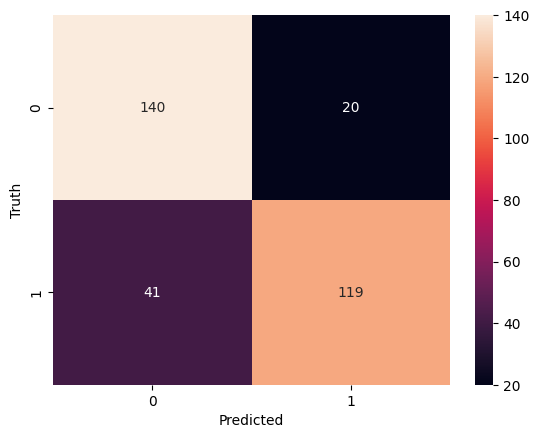

In [33]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
print(classification_report(y_test.deceptive, y_predicted))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       160
           1       0.86      0.74      0.80       160

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320

